In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing
from sklearn.metrics import accuracy_score

from mlgrad.funcs import Exp, Hinge, Hinge2, Sigmoidal
from sys import float_info

from math import sqrt

In [2]:
from mlgrad.cls import MarginMaximization

In [3]:
X, Y = datasets.load_iris(return_X_y=True)
U = decomposition.PCA(n_components=2).fit_transform(X)

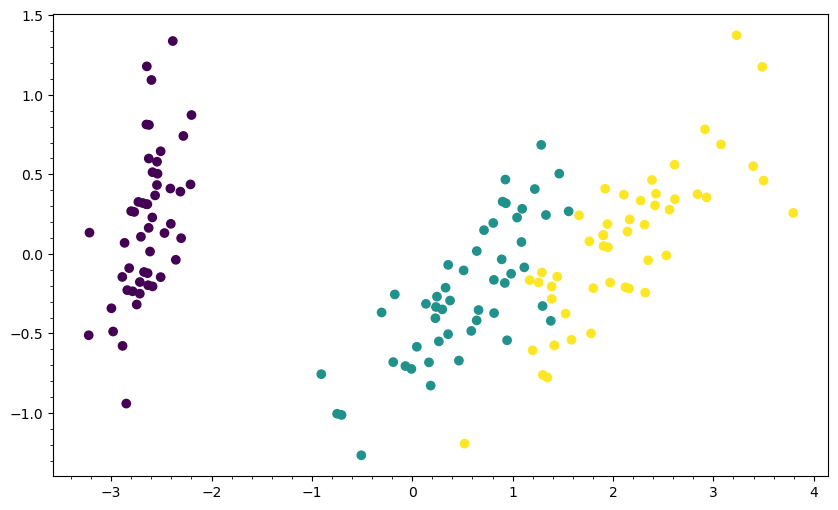

In [4]:
plt.figure(figsize=(10,6))
sc = plt.scatter(U[:,0], U[:,1], c=Y, s=36)
plt.minorticks_on()
plt.show()

In [5]:
U2 = U[Y != 0]
Y2 = Y[Y != 0]
np.putmask(Y2, Y2 == 1, -1)
np.putmask(Y2, Y2 == 2, +1)
Y2 = Y2.astype('d')
N = len(Y2)

In [6]:
def calc_zz(mod, xr, yr):
    xrange = np.linspace(xr[0], xr[1], 101)
    yrange = np.linspace(yr[0], yr[1], 101)
    XX, YY = np.meshgrid(xrange, yrange)
    XY = np.c_[XX.ravel(), YY.ravel()]
    ZZ = mod.evaluate(XY)
    ZZ = ZZ.reshape(XX.shape)
    return ZZ

In [7]:
mm = MarginMaximization(Hinge(0.), tol=1.0e-8)

2
21
3
11
3
0


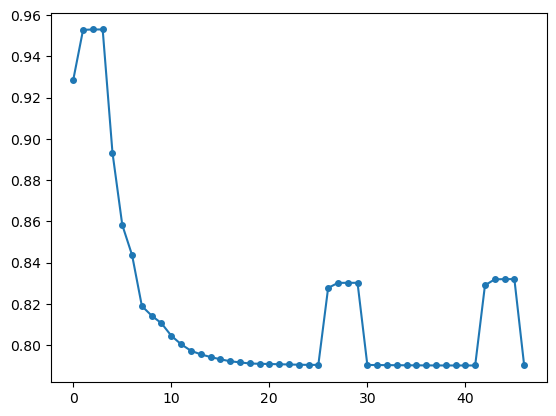

2
[0.9286854550839923, 0.9529061380037845, 0.9530912558560135, 0.9530912558560135, 0.8933474627417081, 0.8582761744163068, 0.8436573768931879, 0.8189496067134755, 0.8142942679604803, 0.8105945813210463, 0.8045609922267236, 0.8004415151296383, 0.7972930586338837, 0.7955474222487269, 0.794245281918707, 0.7931422259100089, 0.792189240374729, 0.7916419873902731, 0.7911123011356225, 0.7909516908949251, 0.7908548011652278, 0.7907398757019958, 0.7906202829442122, 0.7905089178615633, 0.7904259116782671, 0.7904187805463738, 0.8277427192521121, 0.8301972513329541, 0.8302260644129094, 0.8302260644129094, 0.7903795385685808, 0.790340754601981, 0.7903028546891765, 0.7902663581077346, 0.7902319536083147, 0.790200621888843, 0.7901738175712762, 0.790153610200184, 0.7901421041075258, 0.7901386399248025, 0.7901383648258473, 0.7901383631995761, 0.829036518659559, 0.8319116171586128, 0.8320174422644755, 0.8320174422644755, 0.7901383631995196]


In [8]:
mm.fit(U2, Y2)
plt.plot(mm.lvals, marker='o', markersize=4)
plt.show()
print(mm.K)
print(mm.lvals)


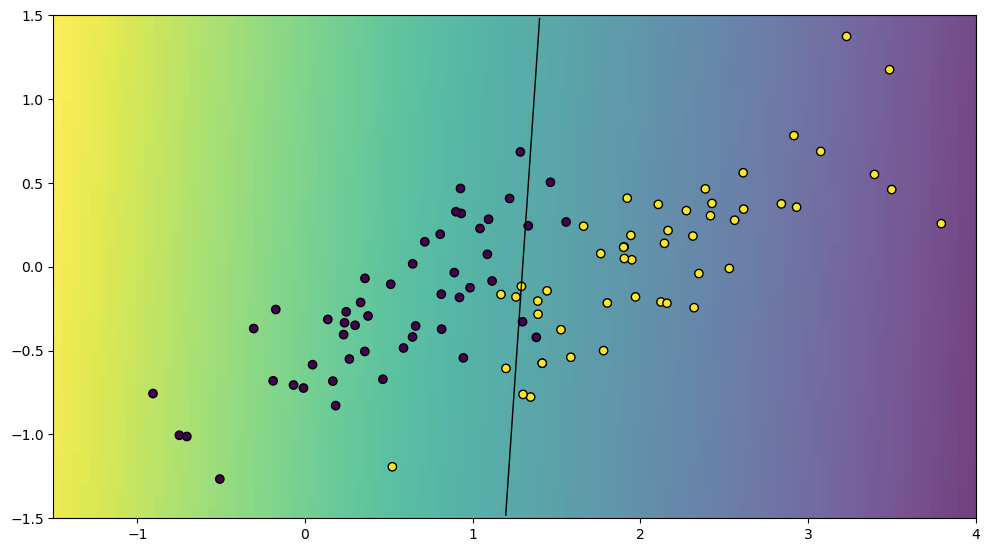

In [9]:
ZZ = calc_zz(mm, [-1.5, 4], [-1.5, 1.5])
extent = (-1.5, 4, -1.5, 1.5)
plt.figure(figsize=(10,6))
plt.scatter(U2[:,0], U2[:,1], c=Y2, edgecolors='k', s=36)
cb = plt.imshow(ZZ, origin='lower', extent=extent, alpha=0.75)
plt.contour(ZZ, levels=[0], origin='lower', extent=extent, linewidths=1, colors='k')
# plt.contour(ZZ, levels=np.linspace(-2, 2, 21), origin='lower', extent=extent, linewidths=0.5, linestyles='--')
# plt.colorbar(cb, )
plt.xlim(-1.5, 4)
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.show()

In [10]:
accuracy_score(Y2, np.sign(mm.evaluate(U2)))

0.09